# //irisで練習

## //学習データセットと検証データセットの準備

In [76]:
from sklearn.datasets import load_iris

#Irisデータセットを読み込む
iris = load_iris()
X = iris.data
y = iris.target

from sklearn.model_selection import train_test_split

X_train,X_test, y_train,y_test = train_test_split(X,y, test_size=0.3, random_state=123)

X_train.shape,X_test.shape, y_train.shape,y_test.shape

((105, 4), (45, 4), (105,), (45,))

iris.dataは、がくの長さ、がくの幅、花びらの長さ、花びらの幅
iris.targetは、0:Setosa, 1:Versicolor, 2:Virginica 

## //グリッドサーチで決定木の深さの最適値を求める

In [60]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
param_grid = {"max_depth": [1,2,3,4]}

#10分割クロスバリデーションでグリッドサーチ
from sklearn.model_selection import GridSearchCV 
cv = GridSearchCV(clf, param_grid=param_grid, cv=10)
cv.fit(X, y)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [1, 2, 3, 4]})

In [61]:
#最適な深さを確認
cv.best_params_

{'max_depth': 3}

In [63]:
#推定された最適なモデルを用いて予測を行う
cv.best_estimator_.predict(X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

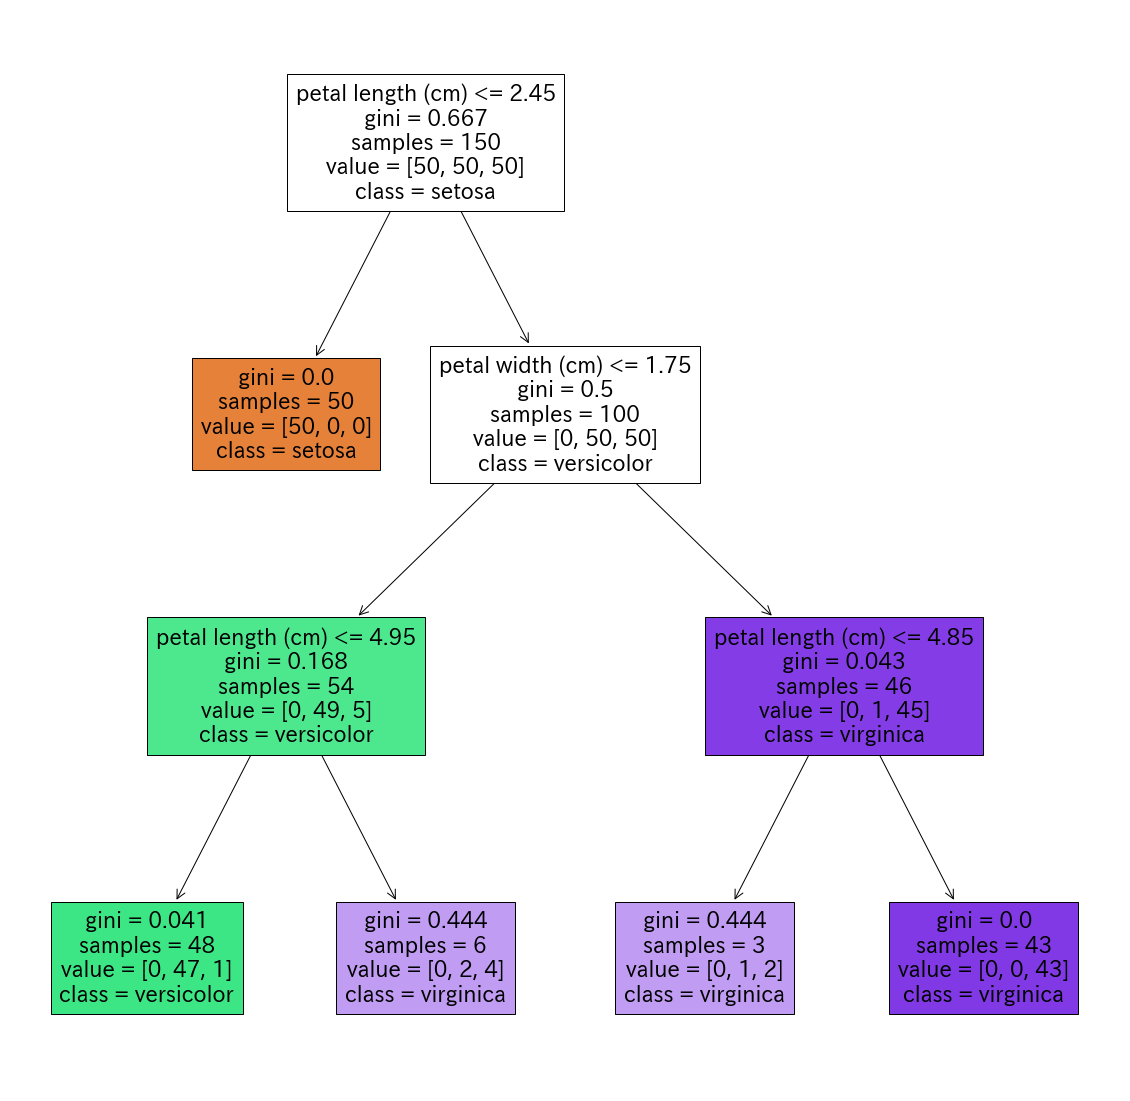

In [19]:
#最適な決定木を描画
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,20))
plot_tree(cv.best_estimator_, class_names=iris["target_names"], feature_names=iris["feature_names"], filled=True)
plt.savefig("best_tree.png")

図の読み方

valueには[Setosa, Versicolor, Virginica]の個数
classはvalueの多数決の解答

giniは
例えば、一番上のノードではvalue=[32, 40, 33]よりP0=32/105,P1=40/105,P2=33/105. gini=1-(P0^2+P1^2+P2^2)=0.663

# //既存データまとめ.xlsxでやる

## //前処理

In [4]:
import pandas as pd
#読み込む
df = pd.read_excel("既存データまとめ.xlsx",sheet_name="Sheet2")

##前処理
#"実験日"と"開始時間"は特性と関係なさそうなので、削除
df = df.drop("実験日",axis=1)
df = df.drop("開始時間",axis=1)
#カテゴリ変数はラベルエンコーディング
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(df["実験者"])
df.loc[:,"実験者encoded"] = le.transform(df["実験者"])
le.fit(df["実験ブース"])
df.loc[:,"実験ブースencoded"] = le.transform(df["実験ブース"])
#見やすいように、カラムを入れ替え
df = df.iloc[:,[0,5,10,11,1,2,3,4,6,7,8,9]]
df.to_pickle("既存データまとめ.pickle")
df

,実験者,実験ブース,実験者encoded,実験ブースencoded,室温,溶剤量,触媒,温度,撹拌時間,反応時間,収率,副生成物
0,計太,ブースA,1,0,21.0,10,0.005,100,120,10,89.8,1.67
1,計太,ブースA,1,0,21.0,10,0.010,100,120,10,90.2,1.54
2,計太,ブースA,1,0,21.0,10,0.015,100,120,10,90.5,1.44
3,計太,ブースA,1,0,21.0,10,0.020,100,120,10,90.9,1.38
4,計太,ブースA,1,0,21.0,10,0.025,100,120,10,91.3,1.36
5,計太,ブースA,1,0,21.0,10,0.030,100,120,10,91.7,1.36
6,統子,ブースB,0,1,23.0,10,0.010,100,120,15,74.4,1.72
7,統子,ブースB,0,1,23.0,10,0.020,100,120,15,91.2,2.59
8,統子,ブースB,0,1,23.0,10,0.030,100,120,15,91.5,4.21
9,計太,ブースB,1,1,21.5,5,0.005,80,120,8,25.8,0.07


## //パーティション（決定木）を実行
目的変数が、離散値のときは分類木、連続値のときは回帰木という。グリッドサーチで決定木の深さの最適値を求める

### //収率をパーティションにかける

In [54]:
X = df.loc[:,"実験者encoded":"反応時間"]
y = df.loc[:,"収率"]

while(True):
    #学習データセットと検証データセットに分ける
    from sklearn.model_selection import train_test_split
    X_train,X_test, y_train,y_test = train_test_split(X,y, test_size=0.3)

    from sklearn.tree import DecisionTreeRegressor
    dtr = DecisionTreeRegressor()#分岐の評価関数はデフォルトのMSE(平均二乗誤差)

    #10分割クロスバリデーションでグリッドサーチ
    from sklearn.model_selection import GridSearchCV
    param_grid = {"max_depth": range(1,len(X.columns)-1)}
    cv = GridSearchCV(dtr, param_grid=param_grid, cv=5, scoring="r2") #ハイパーパラメータの評価関数はR^2(決定係数、寄与率)
    cv.fit(X_train, y_train)
    dtr_best = cv.best_estimator_

    #R^2を算出する
    from sklearn.metrics import r2_score
    y_pred = dtr_best.predict(X_test)
    R2 = r2_score(y_test, y_pred)
    print(cv.best_params_, " R^2=",R2)
    
    if(R2>0.5):
        break

{'max_depth': 2}  R^2= 0.5926312901986479


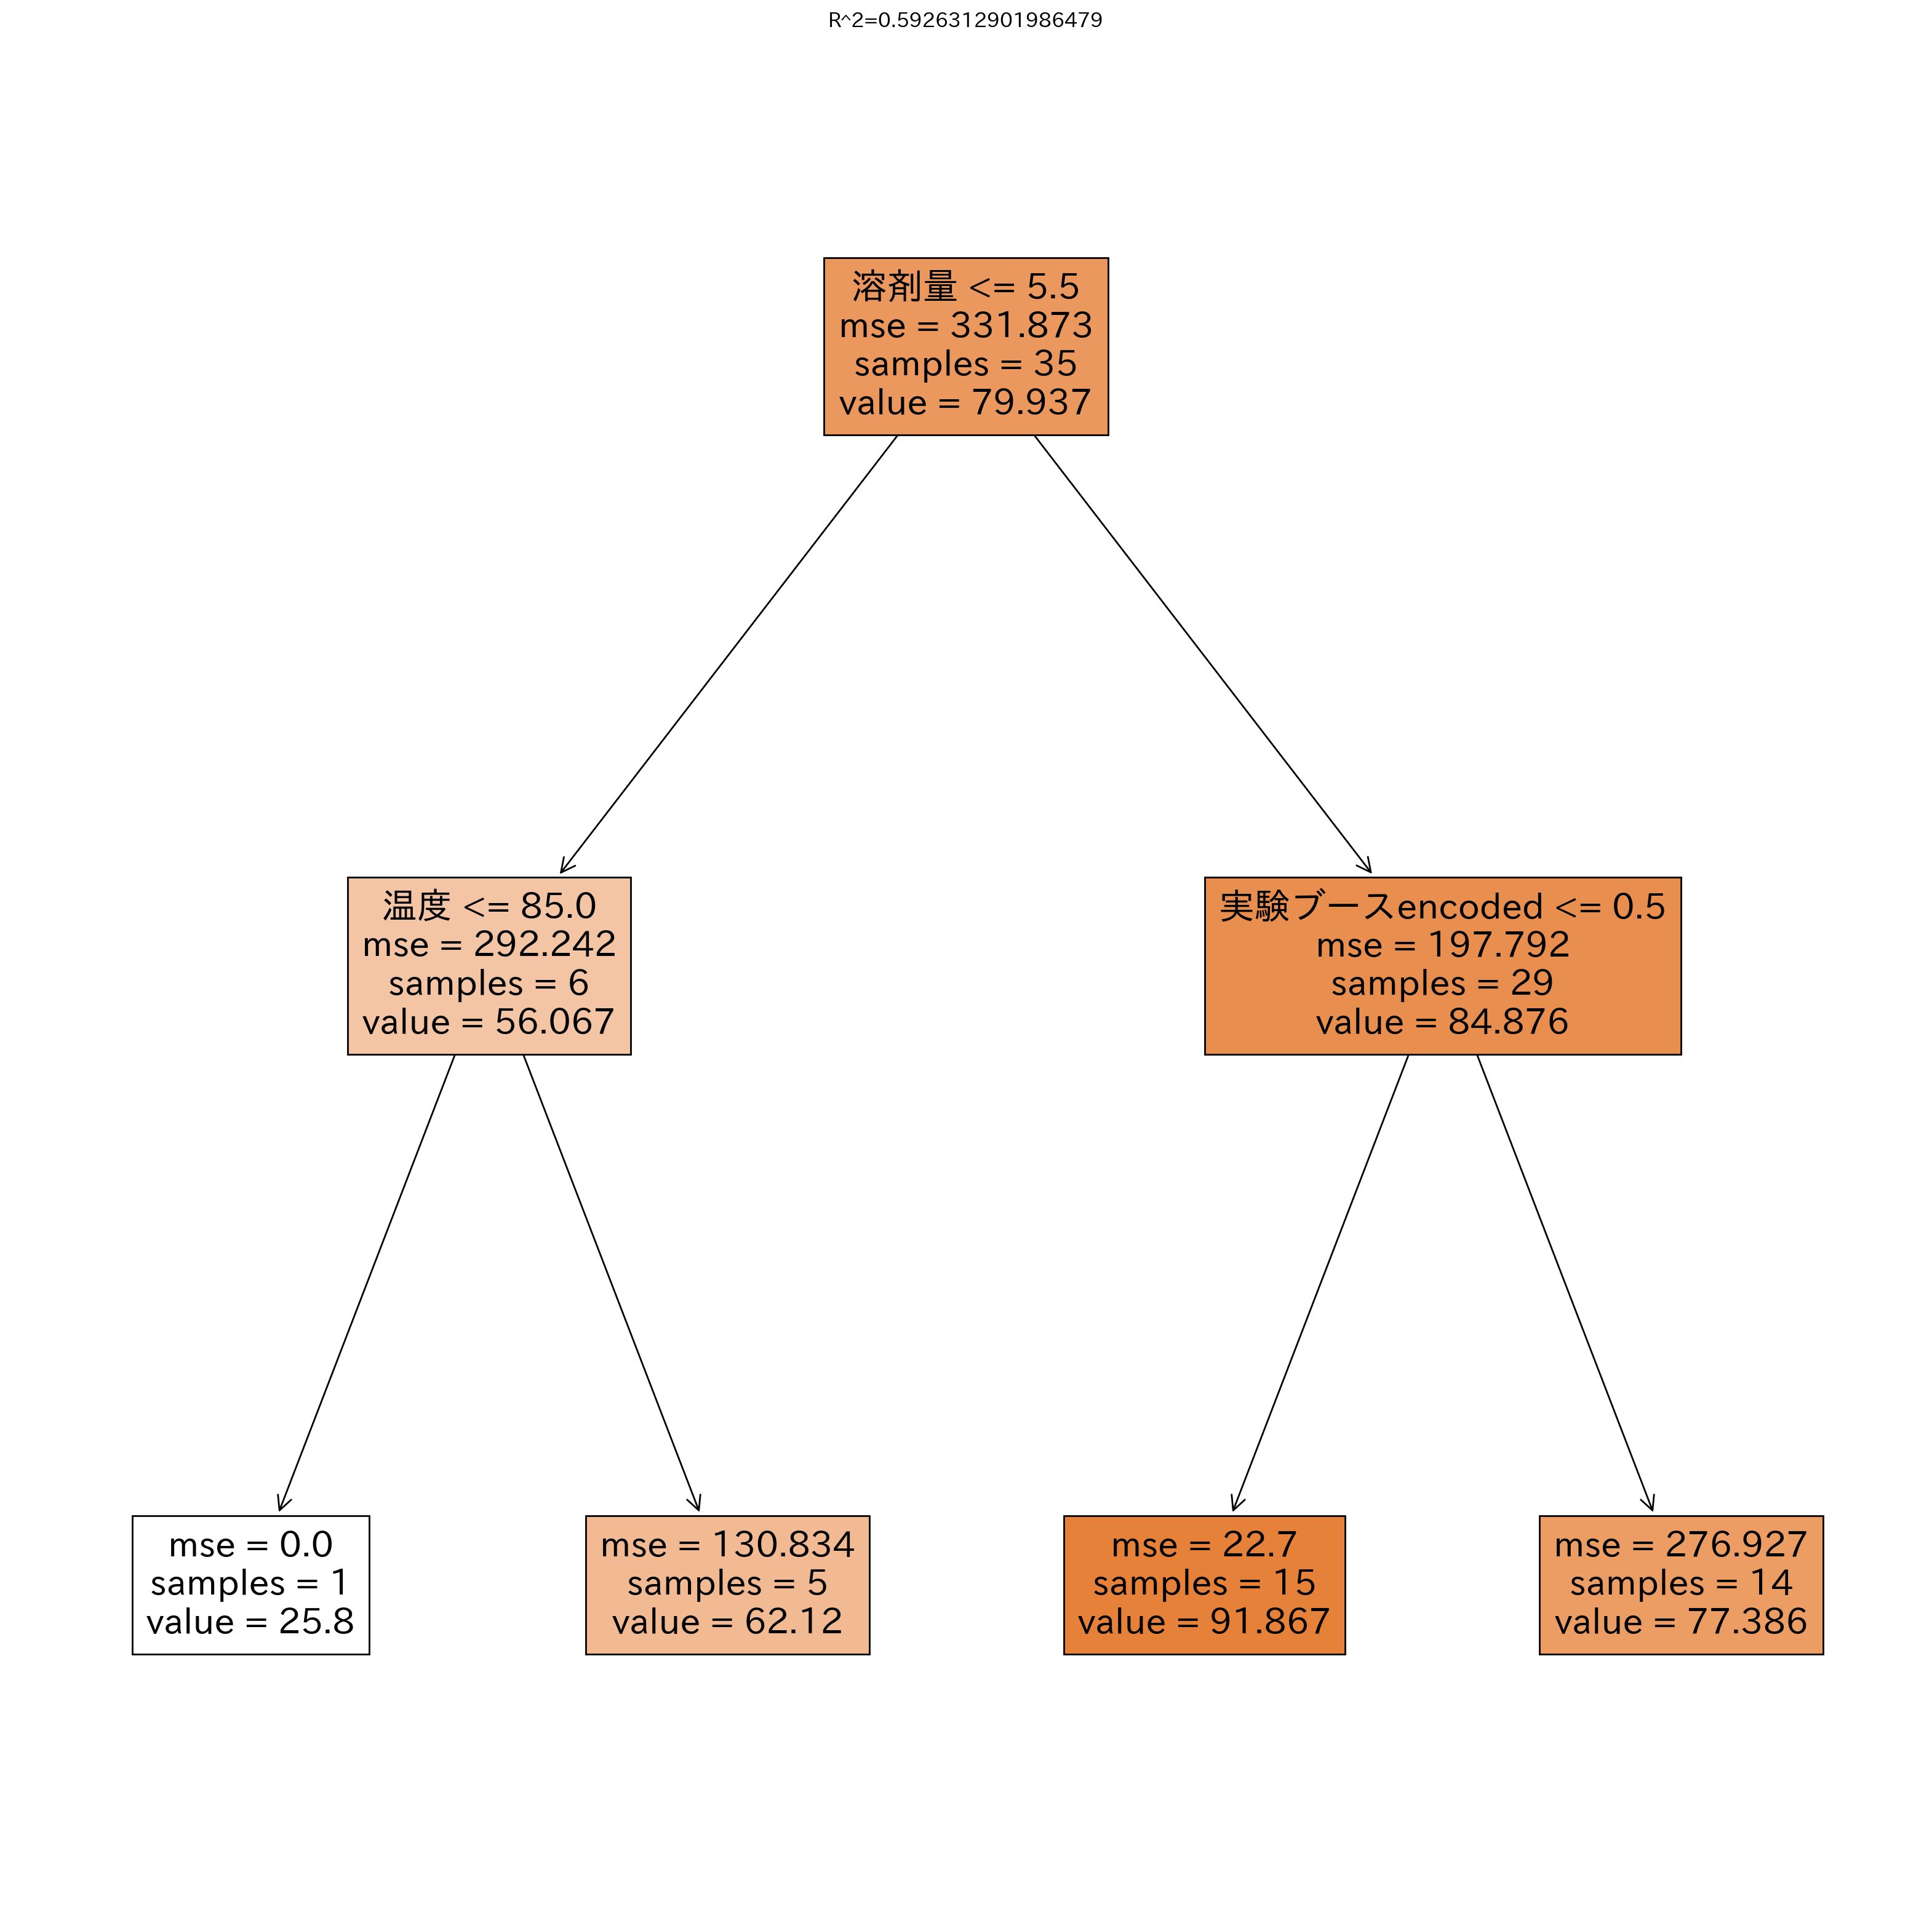

In [55]:
#決定木を描画
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20), dpi=200)
plot_tree(dtr_best, feature_names=X.columns, filled=True)
plt.title("R^2={}".format(R2))
plt.savefig("収率.png")

mseは、平均二乗誤差(Mean Squared Error):実際値と予測値の誤差二乗を平均したもの

In [188]:
import sklearn
help(sklearn.tree._tree.Tree)

Help on class Tree in module sklearn.tree._tree:

class Tree(builtins.object)
 |  Array-based representation of a binary decision tree.
 |  
 |  The binary tree is represented as a number of parallel arrays. The i-th
 |  element of each array holds information about the node `i`. Node 0 is the
 |  tree's root. You can find a detailed description of all arrays in
 |  `_tree.pxd`. NOTE: Some of the arrays only apply to either leaves or split
 |  nodes, resp. In this case the values of nodes of the other type are
 |  arbitrary!
 |  
 |  Attributes
 |  ----------
 |  node_count : int
 |      The number of nodes (internal nodes + leaves) in the tree.
 |  
 |  capacity : int
 |      The current capacity (i.e., size) of the arrays, which is at least as
 |      great as `node_count`.
 |  
 |  max_depth : int
 |      The depth of the tree, i.e. the maximum depth of its leaves.
 |  
 |  children_left : array of int, shape [node_count]
 |      children_left[i] holds the node id of the left child 

In [56]:
df_tree = pd.DataFrame()
df_tree.loc[:,"項"] = X.columns[dtr_best.tree_.feature]
df_tree.loc[:,"mse"] = dtr_best.tree_.impurity
df_tree.loc[:,"samples"] = dtr_best.tree_.n_node_samples
df_tree.loc[:,"mse×samples"] = df_tree.loc[:,"mse"]*df_tree.loc[:,"samples"]
#df_tree.sort_values(by="項")

In [57]:
df_ss = pd.DataFrame()
for i in X.columns:
    df_ss.loc["分岐数",i]=0
    df_ss.loc["平方和",i]=0
    for j in range(len(df_tree)):
        if(df_tree.iloc[j,0]==i):
            df_ss.loc["分岐数",i]+=1
            df_ss.loc["平方和",i]+=df_tree.iloc[j,3]

df_ss = df_ss.T
df_ss.loc[:,"割合"] = df_ss["平方和"]/df_ss["平方和"].sum()
df_ss = df_ss.sort_values(by="割合", ascending=False)
df_ss

,分岐数,平方和,割合
溶剤量,1.0,11615.561714,0.484454
実験ブースencoded,1.0,5735.973103,0.239232
撹拌時間,4.0,4871.638476,0.203183
温度,1.0,1753.453333,0.073132
実験者encoded,0.0,0.000000,0.000000
室温,0.0,0.000000,0.000000
触媒,0.0,0.000000,0.000000
反応時間,0.0,0.000000,0.000000


In [136]:
##関数にしとく
def partition(X, y, plot=False):
    #説明変数をX、目的変数をyに渡して
    #デフォルトではplotしない
    #パーティション結果d_ssを返す
    
    from sklearn.model_selection import train_test_split
    from sklearn.tree import DecisionTreeRegressor
    from sklearn.model_selection import GridSearchCV
    from sklearn.metrics import r2_score
    while(True):
        #学習データセットと検証データセットに分ける
        X_train,X_test, y_train,y_test = train_test_split(X,y, test_size=0.3)
        
        dtr = DecisionTreeRegressor()#分岐の評価関数はデフォルトのMSE(平均二乗誤差)

        #10分割クロスバリデーションでグリッドサーチ
        param_grid = {"max_depth": range(1,len(X.columns)-1)}
        cv = GridSearchCV(dtr, param_grid=param_grid, cv=5, scoring="r2") #ハイパーパラメータの評価関数はR^2(決定係数、寄与率)
        cv.fit(X_train, y_train)
        dtr_best = cv.best_estimator_

        #R^2を算出する
        y_pred = dtr_best.predict(X_test)
        R2 = r2_score(y_test, y_pred)
        print(cv.best_params_, " R^2=",R2)

        if(R2>0.5):
            break

    if(plot):
        #決定木を描画
        from sklearn.tree import plot_tree
        import matplotlib.pyplot as plt
        plt.figure(figsize=(20,20), dpi=200)
        plot_tree(dtr_best, feature_names=X.columns, filled=True)
        plt.title("R^2={}".format(R2))
        plt.savefig("{}.png".format(y.name))

    #決定木の結果をDataFrameに収納
    df_tree = pd.DataFrame()
    df_tree.loc[:,"項"] = X.columns[dtr_best.tree_.feature]
    df_tree.loc[:,"mse"] = dtr_best.tree_.impurity
    df_tree.loc[:,"samples"] = dtr_best.tree_.n_node_samples
    df_tree.loc[:,"mse×samples"] = df_tree.loc[:,"mse"]*df_tree.loc[:,"samples"]

    #df_treeから見たいものを算出
    df_ss = pd.DataFrame()
    for i in X.columns:
        df_ss.loc["分岐数",i]=0
        df_ss.loc["平方和",i]=0
        for j in range(len(df_tree)):
            if(df_tree.iloc[j,0]==i):
                df_ss.loc["分岐数",i]+=1
                df_ss.loc["平方和",i]+=df_tree.iloc[j,3]

    df_ss = df_ss.T
    df_ss.loc[:,"割合"] = df_ss["平方和"]/df_ss["平方和"].sum()
    df_ss = df_ss.sort_values(by="割合", ascending=False)
    
    return df_ss

In [172]:
#関数の動作確認
X = df.loc[:,"実験者encoded":"反応時間"]
y = df.loc[:,"収率"]
partition(X,y)

{'max_depth': 2}  R^2= 0.5682471603455067


,分岐数,平方和,割合
実験ブースencoded,1.0,11096.595429,0.467829
触媒,1.0,7100.958824,0.299374
撹拌時間,4.0,5133.619613,0.216432
温度,1.0,388.151111,0.016364
実験者encoded,0.0,0.000000,0.000000
室温,0.0,0.000000,0.000000
溶剤量,0.0,0.000000,0.000000
反応時間,0.0,0.000000,0.000000


#### //GridSearchなし

max_depth= 1  R^2= 0.21552790376020192
max_depth= 2  R^2= 0.3437143654748066
max_depth= 3  R^2= 0.5172918096406813


,分岐数,平方和,割合
溶剤量,1.0,9821.241714,0.426804
実験ブースencoded,3.0,5039.422989,0.219000
触媒,1.0,3074.456923,0.133608
撹拌時間,8.0,2968.370905,0.128997
温度,2.0,2107.610833,0.091591
実験者encoded,0.0,0.000000,0.000000
室温,0.0,0.000000,0.000000
反応時間,0.0,0.000000,0.000000


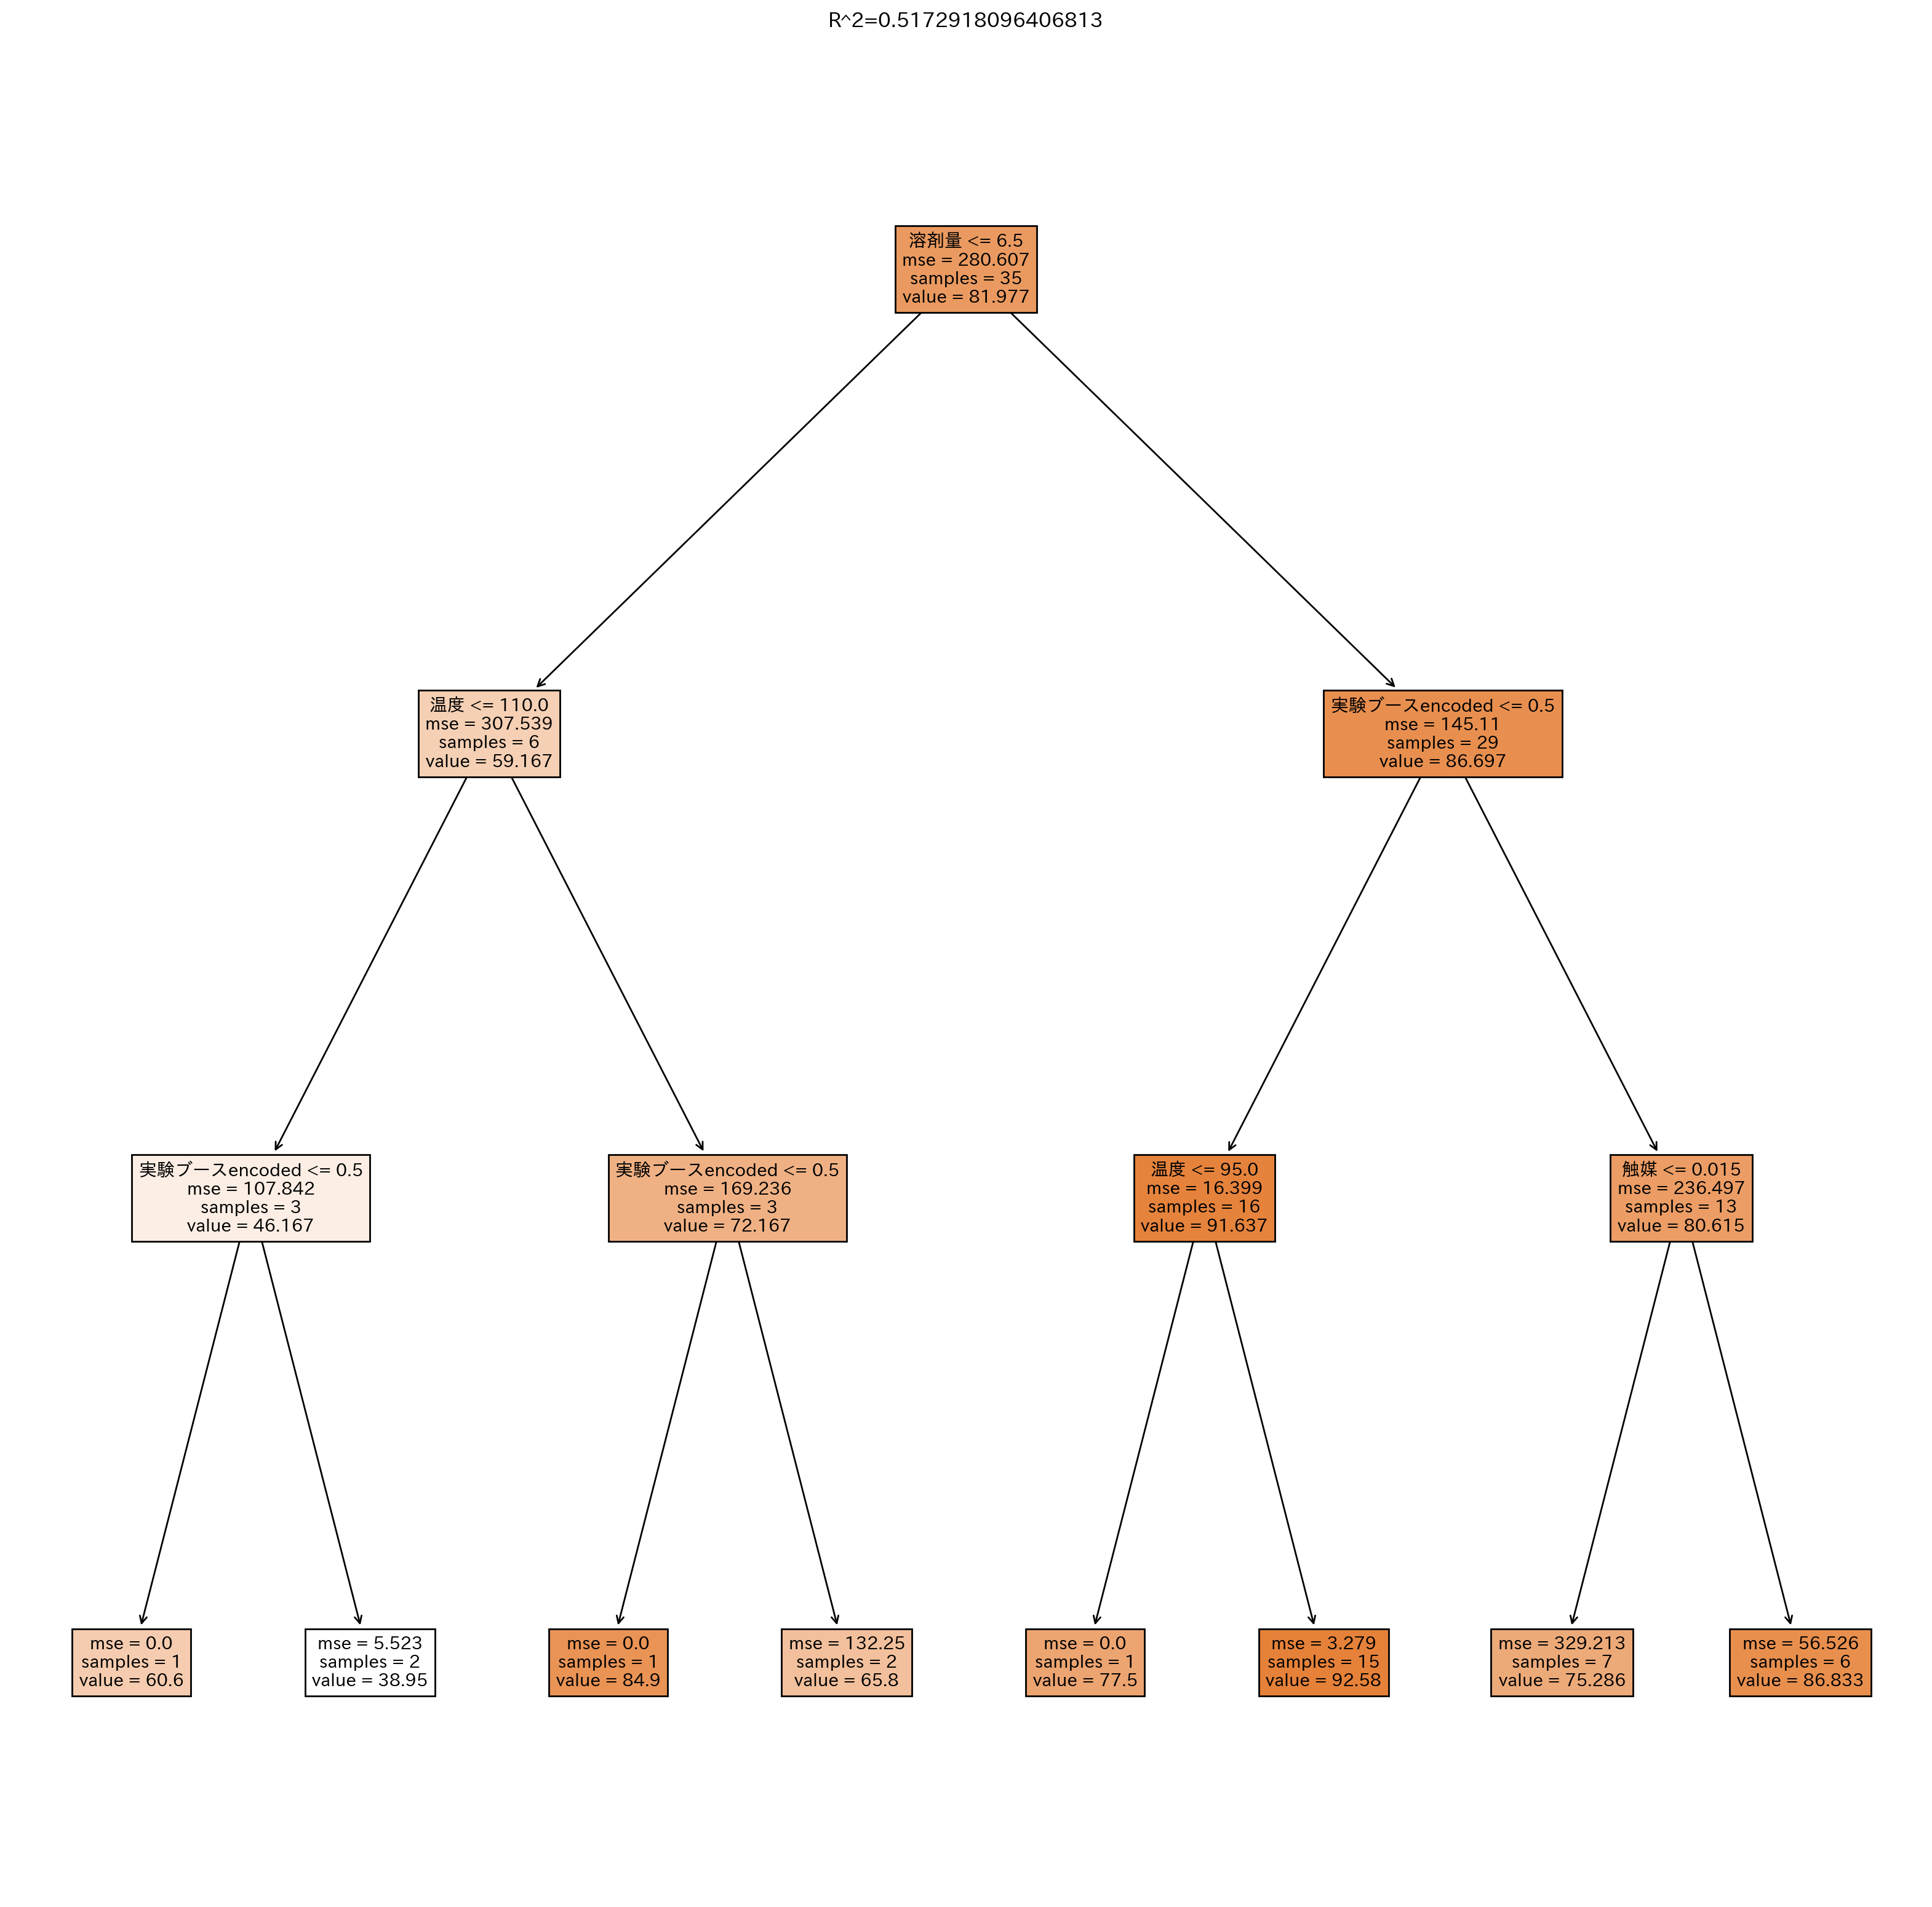

In [60]:
X = df.loc[:,"実験者encoded":"反応時間"]
y = df.loc[:,"収率"]

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

#いいのが出るまでループ
frag=0
while (frag==0):
    #学習データセットと検証データセットに分ける
    X_train,X_test, y_train,y_test = train_test_split(X,y, test_size=0.3)

    for depth in range(1,len(X.columns)):
        if(frag==1):
            break

        #回帰木のインスタンスを生成
        dtr = DecisionTreeRegressor(max_depth=depth)#分岐の評価関数はデフォルトのMSE(平均二乗誤差)
        dtr.fit(X_train, y_train)

        #R^2(決定係数、寄与率)を算出する
        y_pred = dtr.predict(X_test)
        R2 = r2_score(y_test, y_pred)
        print("max_depth=",depth, " R^2=",R2)
        
        if(R2>0.5):
            frag = 1
            dtr_best=dtr

#決定木を描画
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20), dpi=200)
plot_tree(dtr_best, feature_names=X.columns, filled=True)
plt.title("R^2={}".format(R2))
plt.savefig("{}.png".format(y.name))

#決定木の結果をDataFrameに収納
df_tree = pd.DataFrame()
df_tree.loc[:,"項"] = X.columns[dtr_best.tree_.feature]
df_tree.loc[:,"mse"] = dtr_best.tree_.impurity
df_tree.loc[:,"samples"] = dtr_best.tree_.n_node_samples
df_tree.loc[:,"mse×samples"] = df_tree.loc[:,"mse"]*df_tree.loc[:,"samples"]

#df_treeから見たいものを算出
df_ss = pd.DataFrame()
for i in X.columns:
    df_ss.loc["分岐数",i]=0
    df_ss.loc["平方和",i]=0
    for j in range(len(df_tree)):
        if(df_tree.iloc[j,0]==i):
            df_ss.loc["分岐数",i]+=1
            df_ss.loc["平方和",i]+=df_tree.iloc[j,3]

df_ss = df_ss.T
df_ss.loc[:,"割合"] = df_ss["平方和"]/df_ss["平方和"].sum()
df_ss = df_ss.sort_values(by="割合", ascending=False)
df_ss

### //副生成物をパーティションにかける

In [173]:
X = df.loc[:,"実験者encoded":"反応時間"]
y = df.loc[:,"副生成物"]
partition(X,y)

{'max_depth': 6}  R^2= 0.147835300584786
{'max_depth': 6}  R^2= -1.5609067103356677
{'max_depth': 4}  R^2= 0.41266861350833295
{'max_depth': 6}  R^2= 0.628868091633059


,分岐数,平方和,割合
溶剤量,2.0,57.038276,0.477217
温度,9.0,34.846318,0.291546
室温,1.0,19.433200,0.162590
反応時間,4.0,3.910694,0.032719
触媒,1.0,3.629400,0.030366
実験者encoded,1.0,0.438077,0.003665
撹拌時間,19.0,0.226767,0.001897
実験ブースencoded,0.0,0.000000,0.000000


## //パーティションから「室温の寄与が大きい」とわかった。この知見が間違いでないか検証する

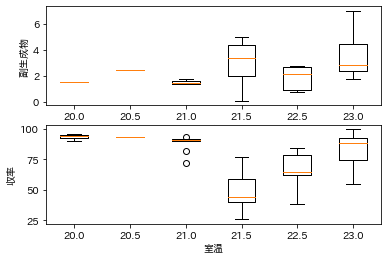

In [132]:
#要素の全種類を取得
elements = []
for i in range(len(df)):
    include_frag=0
    for j in elements:
        if(df.loc[i,"室温"]==j):
            include_frag+=1
    if(include_frag==0):
        elements.append(df.loc[i,"室温"])

elements.sort()
#print(elements)

#前処理
list_box = []
for i in elements:
    temp = df[df["室温"]==i]["収率"].to_numpy()
    list_box.append(temp)
#箱ひげ図でプロット
fig, ax = plt.subplots(2)
ax[1].boxplot(list_box, labels=elements)
ax[1].set_xlabel("室温")
ax[1].set_ylabel("収率")

list_box = []
for i in elements:
    temp = df[df["室温"]==i]["副生成物"].to_numpy()
    list_box.append(temp)
ax[0].boxplot(list_box, labels=elements)
ax[0].set_xlabel("室温")
ax[0].set_ylabel("副生成物")
plt.show()

箱ひげ図から、確かに高温側でばらつきが大きいことを確認した。よって、室温の寄与が大きいのはデータ解析の間違いではなく、真実である。

In [161]:
#関数にしておく

def df_to_boxplot(df, xlabel, y0label, y1label=None):
    #データセットDataFrameをdfに、横軸の名前をxlabelに、縦軸の名前をy0labelに、渡す
    #希望すれば垂直にもう一つ箱ひげ図をプロットする。その縦軸の名前をy1labelに、渡す
    #何も返さない
    
    #要素の全種類を取得
    elements = []
    for i in range(len(df)):
        include_frag=0
        for j in elements:
            if(df.loc[i,xlabel]==j):
                include_frag+=1
        if(include_frag==0):
            elements.append(df.loc[i,xlabel])

    elements.sort()
    print(xlabel,"の種類は",elements)

    #前処理
    list_box = []
    for i in elements:
        temp = df[df[xlabel]==i][y0label].to_numpy()
        list_box.append(temp)
    #箱ひげ図でプロット
    if(y1label!=None):
        fig, ax = plt.subplots(2)
        ax[0].boxplot(list_box, labels=elements)
        ax[0].set_xlabel(xlabel)
        ax[0].set_ylabel(y0label)

        list_box = []
        for i in elements:
            temp = df[df[xlabel]==i][y1label].to_numpy()
            list_box.append(temp)
        ax[1].boxplot(list_box, labels=elements)
        ax[1].set_xlabel(xlabel)
        ax[1].set_ylabel(y1label)
    else:
        fig, ax = plt.subplots()
        ax.boxplot(list_box, labels=elements)
        ax.set_xlabel(xlabel)
        ax.set_ylabel(y0label)
        
    plt.show()

室温 の種類は [20.0, 20.5, 21.0, 21.5, 22.5, 23.0]


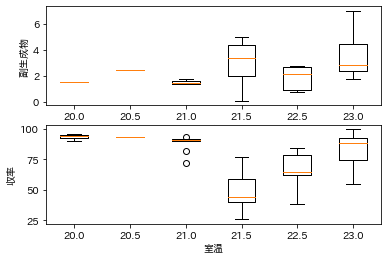

In [162]:
#関数の動作確認
df_to_boxplot(df, "室温", "副生成物","収率")

## //なぜ室温の寄与が大きいのかを調べるために、室温を目的変数にしてパーテーションをかけてみる

In [154]:
X = df.iloc[:,[2,3,5,6,7,8,9,10,11]]
y = df.loc[:,"室温"]
partition(X,y)

{'max_depth': 4}  R^2= 0.923469387755102


,分岐数,平方和,割合
実験者encoded,1.0,35.742857,0.746023
溶剤量,1.0,5.989583,0.125014
触媒,1.0,3.069444,0.064065
反応時間,1.0,1.388889,0.028989
副生成物,3.0,1.012121,0.021125
収率,8.0,0.708333,0.014784
実験ブースencoded,0.0,0.000000,0.000000
温度,0.0,0.000000,0.000000
撹拌時間,0.0,0.000000,0.000000


室温の寄与はほぼ実験者からきていることがわかる。「そういえば私部屋に入るときいつもエアコンの温度を少し上げてるわ」

### //室温と実験者の関係を確認する 

実験者 の種類は ['統子', '計太']


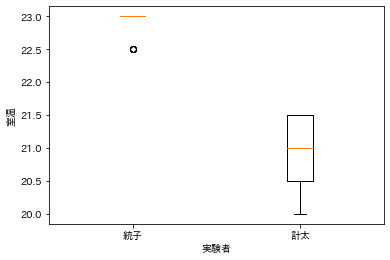

In [166]:
df_to_boxplot(df,"実験者","室温")

実験者 の種類は ['統子', '計太']


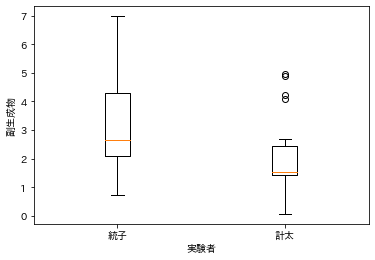

In [169]:
df_to_boxplot(df,"実験者","副生成物")

実験ブース の種類は ['ブースA', 'ブースB']


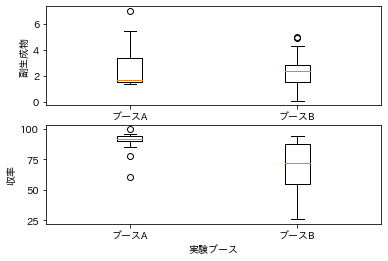

In [170]:
df_to_boxplot(df,"実験ブース","副生成物","収率")